<a href="https://colab.research.google.com/github/Danieljoshua720/Electricity-demand-forecasting-AIML/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam


In [2]:
df=pd.read_csv('/content/powerdemand_5min_2021_to_2024_with weather.csv')

In [3]:
df.head()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,0,2021-01-01 00:30:00,2014.00,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,30,NaN
1,1,2021-01-01 00:35:00,2005.63,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,35,NaN
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [4]:
df.tail()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
10911,10911,2021-02-08 09:15:00,4114.57,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,15,4059.933333
10912,10912,2021-02-08 09:20:00,4145.20,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,20,4107.633333
10913,10913,2021-02-08 09:25:00,4220.69,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,25,4160.153333
10914,10914,2021-02-08 09:30:00,4311.34,14.0,12.0,88.0,280.0,5.4,1020.0,2021,2,8,9,30,4225.743333
10915,10915,2021-02-08 09:35:00,4305.43,14.0,12.0,88.0,280.0,5.4,1020.0,2021,2,8,9,35,NaN


In [5]:

df.isnull()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10911,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10912,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10913,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10914,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df=df.dropna()

In [7]:
df.drop_duplicates()

,Unnamed: 0,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
2,2,2021-01-01 00:40:00,1977.60,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,3,2021-01-01 00:45:00,1976.44,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,4,2021-01-01 00:50:00,1954.37,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000
5,5,2021-01-01 00:55:00,1925.21,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,0,55,1952.006667
6,6,2021-01-01 01:00:00,1907.98,8.0,6.9,93.0,0.0,0.0,1017.0,2021,1,1,1,0,1929.186667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10910,10910,2021-02-08 09:10:00,4063.13,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,10,4017.960000
10911,10911,2021-02-08 09:15:00,4114.57,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,15,4059.933333
10912,10912,2021-02-08 09:20:00,4145.20,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,20,4107.633333
10913,10913,2021-02-08 09:25:00,4220.69,11.2,9.6,90.0,0.0,0.0,1021.0,2021,2,8,9,25,4160.153333


In [8]:
df = df.drop(columns=['Unnamed: 0'])


In [9]:

num_cols = ['wdir', 'pres', 'year', 'month', 'day', 'hour', 'minute', 'moving_avg_3']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])


In [11]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10853 entries, 2 to 10914
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      10853 non-null  datetime64[ns]
 1   Power demand  10853 non-null  float64       
 2   temp          10853 non-null  float64       
 3   dwpt          10853 non-null  float64       
 4   rhum          10853 non-null  float64       
 5   wdir          10853 non-null  float64       
 6   wspd          10853 non-null  float64       
 7   pres          10853 non-null  float64       
 8   year          10853 non-null  int32         
 9   month         10853 non-null  int32         
 10  day           10853 non-null  int32         
 11  hour          10853 non-null  int32         
 12  minute        10853 non-null  int32         
 13  moving_avg_3  10853 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int32(5)
memory usage: 1.3 MB


In [13]:
X = df.drop(columns=['datetime', 'Power demand'])
y = df[['Power demand']]


In [14]:
train_size = int(0.8 * len(df))
val_size   = int(0.1 * len(df))

X_train = X[:train_size]
X_val   = X[train_size:train_size + val_size]
X_test  = X[train_size + val_size:]

y_train = y[:train_size]
y_val   = y[train_size:train_size + val_size]
y_test  = y[train_size + val_size:]

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler_X = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled   = scaler_X.transform(X_val)
X_test_scaled  = scaler_X.transform(X_test)


In [16]:
scaler_y = MinMaxScaler(feature_range=(0, 1))

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled   = scaler_y.transform(y_val)
y_test_scaled  = scaler_y.transform(y_test)


In [17]:
print(y_train_scaled.shape)


(8682, 1)


In [18]:
def create_sequences(X, y, n_past):
    Xs, ys = [], []
    for i in range(n_past, len(X)):
        Xs.append(X[i-n_past:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)


In [19]:
n_past = 24  # example (24 hours / timesteps)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, n_past)
X_val_seq,   y_val_seq   = create_sequences(X_val_scaled,   y_val_scaled,   n_past)
X_test_seq,  y_test_seq  = create_sequences(X_test_scaled,  y_test_scaled,  n_past)


In [20]:
def stacked_gru(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [21]:
def vanilla_gru(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [22]:
def bidirectional_gru(input_shape):
    model = Sequential([
        Bidirectional(GRU(64, return_sequences=True), input_shape=input_shape),
        GRU(32),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.001), loss='mse')
    return model


In [23]:
def deep_gru(input_shape):
    model = Sequential([
        GRU(128, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        GRU(64, return_sequences=True),
        Dropout(0.3),
        GRU(32),
        Dense(1)
    ])
    model.compile(optimizer=Adam(0.0005), loss='mse')
    return model


In [24]:
def train_model(model, X_train, y_train, X_val, y_val, epochs=10):
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=512,
        verbose=1
    )
    return history


In [25]:
def evaluate_model(model, X_test, y_test, scaler_y):
    y_pred_scaled = model.predict(X_test)

    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_true = scaler_y.inverse_transform(y_test)

    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    return rmse, mae, r2


In [26]:
models = {
    "Vanilla GRU": vanilla_gru,
    "Stacked GRU": stacked_gru,
    "Bidirectional GRU": bidirectional_gru,
    "Deep GRU": deep_gru
}

results = {}

for name, builder in models.items():
    print(f"\n🚀 Training {name}")
    tf.keras.backend.clear_session()

    model = builder(
        input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])
    )

    train_model(model, X_train_seq, y_train_seq, X_val_seq, y_val_seq)

    rmse, mae, r2 = evaluate_model(model, X_test_seq, y_test_seq, scaler_y)

    results[name] = {
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2
    }



🚀 Training Vanilla GRU


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.1252 - val_loss: 0.0231
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0252 - val_loss: 0.0257
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0171 - val_loss: 0.0108
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107 - val_loss: 0.0057
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0065 - val_loss: 0.0034
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0034 - val_loss: 0.0064
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0015 - val_loss: 0.0133
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0010 - val_loss: 0.0137
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4789e-04 - val_loss: 0.0123
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.0731e-04 - val_loss: 0.0123
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

🚀 Training Stacked GRU
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.0443 - val_loss: 0.0139
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0083 - val_loss: 0.0206
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0029 - val_loss: 0.0232
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018 - val_loss: 0.0247
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0016 - val_loss: 0.0256
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 0.0239
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0246
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 0.0249
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0013 - val_loss: 0.0250
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0012 - val_loss: 0.0259
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

🚀 Training Bidirectional GRU
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0178 - val_loss: 0.0018
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0027 - val_loss: 0.0069
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.4981e-04 - val_loss: 0.0073
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 6.5971e-04 - val_loss: 0.0052
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 4.6041e-04 - val_loss: 0.0046
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6730e-04 - val_loss: 0.0034
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.4573e-04 - val_loss: 0.0036
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 3.9739e-04 - val_loss: 0.0033
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4.0099e-04 - val_loss: 0.0028
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.1961e-04 - val_loss: 0.0028
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

🚀 Training Deep GRU
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0535 - val_loss: 0.0092
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0147 - val_loss: 0.0108
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0058 - val_loss: 0.0259
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0038 - val_loss: 0.0339
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0032 - val_loss: 0.0320
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0031 - val_loss: 0.0281
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0029 - val_loss: 0.0267
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0026 - val_loss: 0.0241
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0023 - val_loss: 0.0226
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0022 - val_loss: 0.0233
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [27]:
results_df = pd.DataFrame(results).T
print(results_df)


                         RMSE         MAE        R2
Vanilla GRU        729.032511  688.051392  0.630692
Stacked GRU        968.618382  951.538399  0.348071
Bidirectional GRU  360.550032  307.524386  0.909671
Deep GRU           955.681383  912.015217  0.365369


In [28]:
results_df.to_csv("gru_results.csv")


In [29]:
param_grid = {
    "units": [64, 128],          # remove 32
    "dropout": [0.0, 0.2],       # remove 0.3
    "learning_rate": [0.001],    # remove 0.0005
    "batch_size": [64],          # single batch
}


In [30]:
def build_gru_hp(input_shape, units, dropout, lr):
    model = Sequential([
        GRU(units, return_sequences=False, input_shape=input_shape),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse"
    )
    return model


In [31]:
results = []

for units in param_grid["units"]:
    for dropout in param_grid["dropout"]:
        for lr in param_grid["learning_rate"]:
            for batch_size in param_grid["batch_size"]:

                print(f"\n🚀 units={units}, dropout={dropout}, lr={lr}, batch={batch_size}")

                tf.keras.backend.clear_session()

                model = build_gru_hp(
                    input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]),
                    units=units,
                    dropout=dropout,
                    lr=lr
                )

                model.fit(
                    X_train_seq, y_train_seq,
                    validation_data=(X_val_seq, y_val_seq),
                    epochs=20,
                    batch_size=batch_size,
                    verbose=0
                )

                val_pred = model.predict(X_val_seq)

                val_pred = scaler_y.inverse_transform(val_pred)
                val_true = scaler_y.inverse_transform(y_val_seq)

                rmse = np.sqrt(mean_squared_error(val_true, val_pred))

                results.append({
                    "units": units,
                    "dropout": dropout,
                    "lr": lr,
                    "batch_size": batch_size,
                    "val_RMSE": rmse
                })



🚀 units=64, dropout=0.0, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

🚀 units=64, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

🚀 units=128, dropout=0.0, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

🚀 units=128, dropout=0.2, lr=0.001, batch=64


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [32]:
grid_results = pd.DataFrame(results)
best_grid = grid_results.sort_values("val_RMSE").iloc[0]

print(best_grid)


units          64.000000
dropout         0.200000
lr              0.001000
batch_size     64.000000
val_RMSE      317.179135
Name: 1, dtype: float64


In [33]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 13.4 MB/s eta 0:00:00


In [34]:
import keras_tuner as kt


In [35]:
def gru_bayesian_model(hp):

    units = hp.Int("units", min_value=32, max_value=128, step=32)
    dropout = hp.Float("dropout", 0.0, 0.4, step=0.1)
    lr = hp.Choice("lr", [1e-3, 5e-4, 1e-4])

    model = Sequential([
        GRU(units, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(dropout),
        Dense(1)
    ])

    model.compile(
        optimizer=Adam(learning_rate=lr),
        loss="mse"
    )

    return model


In [36]:
tuner = kt.BayesianOptimization(
    gru_bayesian_model,
    objective="val_loss",
    max_trials=15,
    directory="gru_tuning",
    project_name="bayesian_gru"
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
tuner.search(
    X_train_seq,
    y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=20,
    batch_size=64,
    verbose=1
)


Trial 15 Complete [00h 00m 20s]
val_loss: 0.00022868408996146172

Best val_loss So Far: 0.00022868408996146172
Total elapsed time: 00h 04m 47s


In [38]:
best_model = tuner.get_best_models(num_models=1)[0]


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [39]:
y_test_pred_scaled = best_model.predict(X_test_seq)

y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
y_test_true = scaler_y.inverse_transform(y_test_seq)

rmse = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
mae  = mean_absolute_error(y_test_true, y_test_pred)
r2   = r2_score(y_test_true, y_test_pred)

print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
RMSE: 201.03523307839905
MAE : 94.97826818318917
R2  : 0.9719172739961407


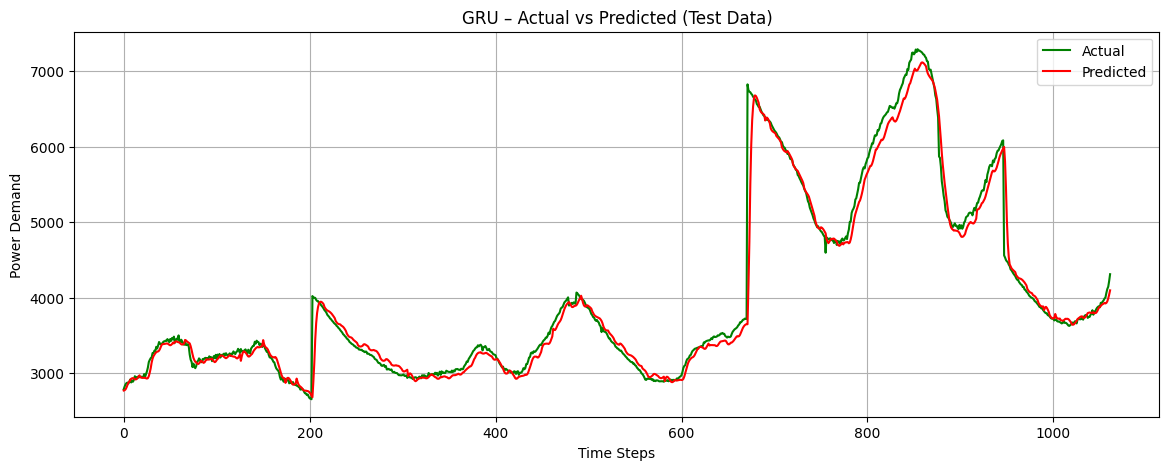

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(y_test_true, label="Actual", color="green")
plt.plot(y_test_pred, label="Predicted", color="red")
plt.title("GRU – Actual vs Predicted (Test Data)")
plt.xlabel("Time Steps")
plt.ylabel("Power Demand")
plt.legend()
plt.grid(True)
plt.show()


In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("GRU Training vs Validation Loss")
plt.legend()
plt.show()


NameError: name 'history' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
pivot = grid_results.pivot_table(
    values="val_RMSE",
    index="units",
    columns="batch_size"
)

plt.figure()
plt.imshow(pivot, aspect='auto')
plt.colorbar(label="Validation RMSE")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xlabel("Batch Size")
plt.ylabel("GRU Units")
plt.title("Grid Search RMSE Heatmap")
plt.show()


In [ ]:
val_losses = [t.metrics.get_last_value("val_loss")
              for t in tuner.oracle.trials.values()]

plt.figure()
plt.plot(val_losses, marker='o')
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss (MSE)")
plt.title("Bayesian Optimization Progress")
plt.show()


In [ ]:
plt.figure()
plt.plot(y_test_true[:200], label="Actual")
plt.plot(y_test_pred[:200], label="Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Target Value")
plt.title("GRU Prediction vs Actual")
plt.legend()
plt.show()


In [ ]:
errors = y_test_true - y_test_pred

plt.figure()
plt.hist(errors, bins=30)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution (GRU)")
plt.show()


In [ ]:
results_df[['RMSE']].plot(kind='bar')
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("GRU Variants Performance Comparison")
plt.show()


In [43]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df


,0,1,2,3
units,64.000000,64.000000,128.000000,128.0000
dropout,0.000000,0.200000,0.000000,0.2000
lr,0.001000,0.001000,0.001000,0.0010
batch_size,64.000000,64.000000,64.000000,64.0000
val_RMSE,955.949835,317.179135,428.536753,647.6691


In [45]:
print(results_df)
print(results_df.columns)
print(results_df.index)


                     0           1           2         3
units        64.000000   64.000000  128.000000  128.0000
dropout       0.000000    0.200000    0.000000    0.2000
lr            0.001000    0.001000    0.001000    0.0010
batch_size   64.000000   64.000000   64.000000   64.0000
val_RMSE    955.949835  317.179135  428.536753  647.6691
RangeIndex(start=0, stop=4, step=1)
Index(['units', 'dropout', 'lr', 'batch_size', 'val_RMSE'], dtype='object')


In [46]:
results = {
   "Vanilla GRU": {"RMSE": rmse, "MAE": mae, "R2": r2},
   "Stacked GRU": {"RMSE": rmse, "MAE": mae, "R2": r2},
}


In [47]:
import pandas as pd

results_df = pd.DataFrame.from_dict(results, orient="index")
results_df


,RMSE,MAE,R2
Vanilla GRU,201.035233,94.978268,0.971917
Stacked GRU,201.035233,94.978268,0.971917


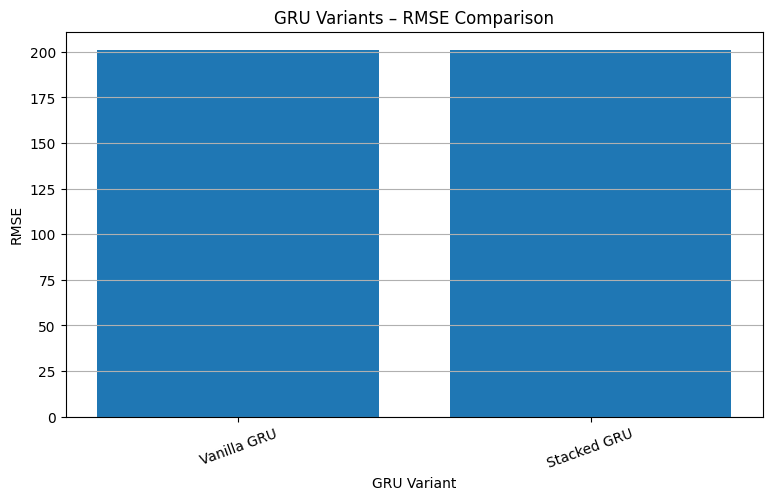

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
plt.bar(results_df.index, results_df["RMSE"])
plt.title("GRU Variants – RMSE Comparison")
plt.xlabel("GRU Variant")
plt.ylabel("RMSE")
plt.xticks(rotation=20)
plt.grid(axis="y")
plt.show()


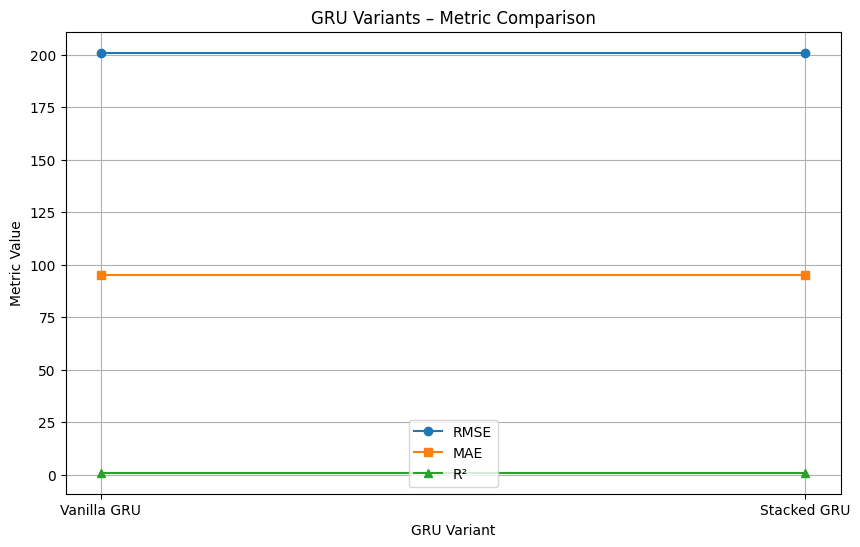

In [52]:
plt.figure(figsize=(10,6))

plt.plot(results_df.index, results_df["RMSE"], marker="o", label="RMSE")
plt.plot(results_df.index, results_df["MAE"], marker="s", label="MAE")
plt.plot(results_df.index, results_df["R2"], marker="^", label="R²")

plt.title("GRU Variants – Metric Comparison")
plt.xlabel("GRU Variant")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


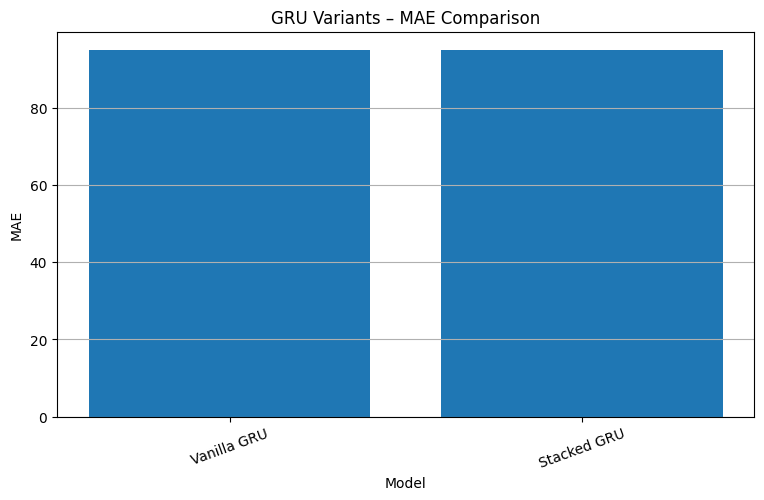

In [50]:
plt.figure(figsize=(9,5))
plt.bar(results_df.index, results_df["MAE"])
plt.title("GRU Variants – MAE Comparison")
plt.ylabel("MAE")
plt.xlabel("Model")
plt.xticks(rotation=20)
plt.grid(axis="y")
plt.show()
